<h1> Day 29 - Class </h1>

## Topics  
- NLP
    - NAIVE Bayes(Bayes Theorem)
    - Latent Semantic Indexing(LSI)
    - LDA (Latent Dirchlent Analysis)
    
- Speech to text
    - pip install google-cloud-speech

- Text pre-processing
    - Convert to lower case
    - Garbage value removal
    - Stop words removal
    - Stemming
    - Lemmatization
    - DTM
        - TF IDF Vector
        - Count vector
- EDA
    - Wordcounts
    - Frequency tables
    - Probability graphs
    - Words combinations    

## Bayes' Theorem

P(A|B) is referred to as the posterior probability and P(A) is referred to as the prior probability.

    P(A|B): Posterior probability.
    P(A): Prior probability.
    
Sometimes P(B|A) is referred to as the likelihood and P(B) is referred to as the evidence.

    P(B|A): Likelihood.
    P(B): Evidence.

This allows Bayes Theorem to be restated as:

    Posterior = Likelihood * Prior / Evidence

What is the probability that there is fire given that there is smoke?

Where P(Fire) is the Prior, P(Smoke|Fire) is the Likelihood, and P(Smoke) is the evidence:

    P(Fire|Smoke) = P(Smoke|Fire) * P(Fire) / P(Smoke)


P(A/B) = P(A and B) / P(B)

P(B/A) = P(B and A) / P(A)

P(A and B) = P(B and A) 

P(A/B) * P(B) = P(B/A) * P(A)

(P(A/B) * P(B)) * 1/P(B) = (P(B/A) * P(A)) * 1/P(B)

P(A/B) = (P(B/A) * P(A)) / P(B)

Probability of A , given that B has already occurred is equal to Probability of B, given that A has already occurred times Probability of A .. divided by Probability of B

<img src='img/bayes-01.png'/>

<b>Posterior Probability & Prior Probability</b>

A posterior probability, in Bayesian statistics, is the revised or updated probability of an event occurring after taking into consideration new information. The posterior probability is calculated by updating the prior probability using Bayes' theorem. In statistical terms, the posterior probability is the probability of event A occurring given that event B has occurred.

<b>What Does a Posterior Probability Tell You?</b>

Bayes' theorem can be used in many applications, such as medicine, finance, and economics. In finance, Bayes' theorem can be used to update a previous belief once new information is obtained. Prior probability represents what is originally believed before new evidence is introduced, and posterior probability takes this new information into account.

Posterior probability distributions should be a better reflection of the underlying truth of a data generating process than the prior probability since the posterior included more information. A posterior probability can subsequently become a prior for a new updated posterior probability as new information arises and is incorporated into the analysis.
Example of a Posterior Probability

As a simple example to envision posterior probability, suppose there are three acres of land with labels A, B and C. One acre has reserves of oil below its surface, while the other two do not. The prior probability of oil in acre C is one-third or 33%. A drilling test is conducted on acre B, and the results indicate that no oil is present at the location. With acre B eliminated, the posterior probability of acre C containing oil becomes 0.5, or 50%.

<b>What Is Prior Probability?</b>

Prior probability, in Bayesian statistical inference, is the probability of an event before new data is collected. This is the best rational assessment of the probability of an outcome based on the current knowledge before an experiment is performed.

<b>Prior Probability Explained</b>

The prior probability of an event will be revised as new data or information becomes available, to produce a more accurate measure of a potential outcome. That revised probability becomes the posterior probability and is calculated using Bayes' theorem. In statistical terms, the posterior probability is the probability of event A occurring given that event B has occurred.

For example, three acres of land have the labels A, B, and C. One acre has reserves of oil below its surface, while the other two do not. The prior probability of oil being found on acre C is one third, or 0.333. But if a drilling test is conducted on acre B, and the results indicate that no oil is present at the location, then the posterior probability of oil being found on acres A and C become 0.5, as each acre has one out of two chances.

Baye’s theorem is a very common and fundamental theorem used in data mining and machine learning.

If we are interested in the probability of an event of which we have prior observations; we call this the prior probability. We'll deem this event A, and its probability P(A). If there is a second event that affects P(A), which we'll call event B, then we want to know what the probability of A is given B has occurred. In probabilistic notation, this is P(A|B), and is known as posterior probability or revised probability. This is because it has occurred after the original event, hence the post in posterior. This is how Baye’s theorem uniquely allows us to update our previous beliefs with new information.


- sklearn.naive_bayes.MultinomialNB

The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.

- sklearn.naive_bayes.BernoulliNB

Naive Bayes classifier for multivariate Bernoulli models.

Like MultinomialNB, this classifier is suitable for discrete data. The difference is that while MultinomialNB works with occurrence counts, BernoulliNB is designed for binary/boolean features.

- sklearn.naive_bayes.GaussianNB

## NLP

In [25]:
import pandas as pd
import numpy as np

df = pd.read_csv(r"D:\sanooj\datascience\data\amazon-reviews-unlocked-mobile-phones\Amazon_Unlocked_Mobile.csv")

df = df.sample(100)
df['Reviews'] = df['Reviews'].str.lower()

unique_words = []
for i in df['Reviews']:
    for j in i.split():
        if j not in unique_words:
            unique_words.append(j)
len(unique_words)

df = pd.DataFrame(unique_words)
df

,0
0,i
1,just
2,got
3,this
4,phone
...,...
1335,memory.
1336,overly
1337,sensitive.
1338,"overall,"


In [1]:
import nltk
#nltk.download()

In [2]:
import urllib.request
response =  urllib.request.urlopen('https://en.wikipedia.org/wiki/SpaceX')
html = response.read()
print(html)

b'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>SpaceX - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"de094302-ca35-4826-9603-bb26c644b9e9","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"SpaceX","wgTitle":"SpaceX","wgCurRevisionId":977699449,"wgRevisionId":977699449,"wgArticleId":832774,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Webarchive template wayback links","CS1 maint: location","CS1 maint: BOT: original-url status unknown","CS1 maint: unfit url","CS1 maint: archived copy as title","CS1 French-language s

In [3]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html,'html5lib')
text = soup.get_text(strip = True)
print(text)

SpaceX - Wikipediadocument.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"de094302-ca35-4826-9603-bb26c644b9e9","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"SpaceX","wgTitle":"SpaceX","wgCurRevisionId":977699449,"wgRevisionId":977699449,"wgArticleId":832774,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Webarchive template wayback links","CS1 maint: location","CS1 maint: BOT: original-url status unknown","CS1 maint: unfit url","CS1 maint: archived copy as title","CS1 French-language sources (fr)","Articles with short description","Short description is different from Wikidata",
"Use American English from Aug

In [4]:
tokens = [t for t in text.split()]
print(tokens)

['SpaceX', '-', 'Wikipediadocument.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"de094302-ca35-4826-9603-bb26c644b9e9","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"SpaceX","wgTitle":"SpaceX","wgCurRevisionId":977699449,"wgRevisionId":977699449,"wgArticleId":832774,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Webarchive', 'template', 'wayback', 'links","CS1', 'maint:', 'location","CS1', 'maint:', 'BOT:', 'original-url', 'status', 'unknown","CS1', 'maint:', 'unfit', 'url","CS1', 'maint:', 'archived', 'copy', 'as', 'title","CS1', 'French-language', 'sources', '(fr)","Articles', 'with', 'short', 'description

SpaceX:184
launch:121
first:114
original:224
RetrievedMarch:143


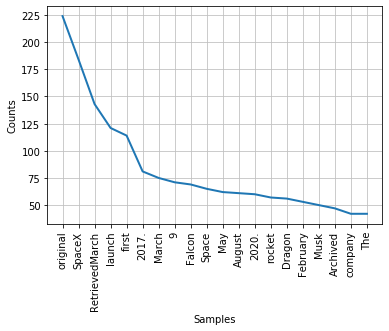

In [7]:
from nltk.corpus import stopwords
sr= stopwords.words('english')
clean_tokens = tokens[:]
for token in tokens:
    if token in stopwords.words('english'):
        clean_tokens.remove(token)
freq = nltk.FreqDist(clean_tokens)
for key,val in freq.items():
    if val > 100:
        print(str(key) + ':' + str(val))
freq.plot(20, cumulative=False)

### Tokenization

In [8]:
from nltk.tokenize import sent_tokenize
text="""Hello Mr. Smith, how are you doing today? The weather is great, and city is awesome.
The sky is pinkish-blue. You shouldn't eat cardboard"""
tokenized_text=sent_tokenize(text)
print(tokenized_text)

['Hello Mr. Smith, how are you doing today?', 'The weather is great, and city is awesome.', 'The sky is pinkish-blue.', "You shouldn't eat cardboard"]


In [9]:
from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(text)
print(tokenized_word)

['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'city', 'is', 'awesome', '.', 'The', 'sky', 'is', 'pinkish-blue', '.', 'You', 'should', "n't", 'eat', 'cardboard']


In [10]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 25 samples and 30 outcomes>


In [11]:
fdist.most_common(2)

[('is', 3), (',', 2)]

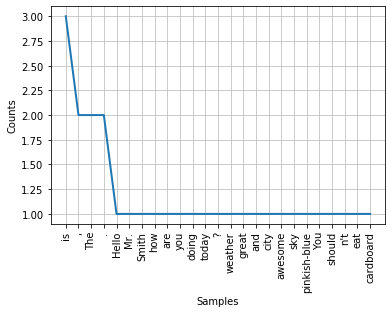

In [12]:
fdist.plot(30,cumulative=False)

### Stopwords

In [13]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

{'their', 'i', 'will', 'on', 'this', "that'll", 'am', 'by', "couldn't", 'its', 'they', 'and', 'some', 'then', "haven't", "isn't", 'a', 'not', 'in', 'under', 'll', 'through', 'have', 'other', "hadn't", 'between', 'below', "you'd", 'needn', 'there', 'weren', 'has', 'ma', 'own', 'too', 'shan', 'himself', "you'll", 'because', 'until', 'yours', 'into', 'nor', 'don', 'd', "won't", 'from', "hasn't", 'what', 'each', 's', 'yourselves', 't', 'yourself', 'hers', 'she', 'should', 'o', 'you', 'or', 'myself', 'how', 'do', 'our', 'doing', 'are', 'having', 've', 'ain', 'hasn', 'wouldn', 'didn', 'did', 'ourselves', 'up', 'very', "she's", "you've", 'herself', 'during', 'for', 'is', 'more', "should've", "don't", 'itself', 'aren', 'that', 'down', "mustn't", 'can', 'with', 'again', 'of', 'while', 'an', 'where', 'haven', 'your', 'mustn', 'themselves', "shouldn't", 'above', 'were', 'being', 'be', 'further', "it's", 'out', 'them', 'so', 'wasn', 'why', 'any', 'we', 'm', 'over', "aren't", "shan't", 'here', 'isn

In [16]:
filtered_sent=[]
for w in tokenized_word:
    if w not in stop_words:
        filtered_sent.append(w)
print("Tokenized Sentence:",tokenized_word)
print()
print("Filterd Sentence:",filtered_sent)

Tokenized Sentence: ['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'city', 'is', 'awesome', '.', 'The', 'sky', 'is', 'pinkish-blue', '.', 'You', 'should', "n't", 'eat', 'cardboard']

Filterd Sentence: ['Hello', 'Mr.', 'Smith', ',', 'today', '?', 'The', 'weather', 'great', ',', 'city', 'awesome', '.', 'The', 'sky', 'pinkish-blue', '.', 'You', "n't", 'eat', 'cardboard']


### Lexicon Normalization
Lexicon normalization considers another type of noise in the text. For example, connection, connected, connecting word reduce to a common word "connect". It reduces derivationally related forms of a word to a common root word.


Stemming is a process of linguistic normalization, which reduces words to their word root word or chops off the derivational affixes. For example, connection, connected, connecting word reduce to a common word "connect".

In [18]:
# Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",filtered_sent)
print()
print("Stemmed Sentence:",stemmed_words)

Filtered Sentence: ['Hello', 'Mr.', 'Smith', ',', 'today', '?', 'The', 'weather', 'great', ',', 'city', 'awesome', '.', 'The', 'sky', 'pinkish-blue', '.', 'You', "n't", 'eat', 'cardboard']

Stemmed Sentence: ['hello', 'mr.', 'smith', ',', 'today', '?', 'the', 'weather', 'great', ',', 'citi', 'awesom', '.', 'the', 'sky', 'pinkish-blu', '.', 'you', "n't", 'eat', 'cardboard']


Lemmatization

Lemmatization reduces words to their base word, which is linguistically correct lemmas. It transforms root word with the use of vocabulary and morphological analysis. Lemmatization is usually more sophisticated than stemming. Stemmer works on an individual word without knowledge of the context. For example, The word "better" has "good" as its lemma. This thing will miss by stemming because it requires a dictionary look-up.

In [19]:
#Lexicon Normalization
#performing stemming and Lemmatization

from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer
stem = PorterStemmer()

word = "flying"
print("Lemmatized Word:",lem.lemmatize(word,"v"))
print("Stemmed Word:",stem.stem(word))

Lemmatized Word: fly
Stemmed Word: fli


In [21]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

ps = PorterStemmer()

words = ['program','programming','programmer','programs','programmers']

for word in words:
    print(word + ' -> ' +ps.stem(word))

program -> program
programming -> program
programmer -> programm
programs -> program
programmers -> programm


In [22]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

print('rocks -> ',lemmatizer.lemmatize('rocks'))
print('good -> ',lemmatizer.lemmatize('good'))

print('better -> ',lemmatizer.lemmatize('better'))
print('corpora -> ',lemmatizer.lemmatize('corpora'))

rocks ->  rock
good ->  good
better ->  better
corpora ->  corpus


### POS Tagging

The primary target of Part-of-Speech(POS) tagging is to identify the grammatical group of a given word. Whether it is a NOUN, PRONOUN, ADJECTIVE, VERB, ADVERBS, etc. based on the context. POS Tagging looks for relationships within the sentence and assigns a corresponding tag to the word.

In [20]:
sent = "Albert Einstein was born in Ulm, Germany in 1879."
tokens=nltk.word_tokenize(sent)
print(tokens)
nltk.pos_tag(tokens)

['Albert', 'Einstein', 'was', 'born', 'in', 'Ulm', ',', 'Germany', 'in', '1879', '.']


[('Albert', 'NNP'),
 ('Einstein', 'NNP'),
 ('was', 'VBD'),
 ('born', 'VBN'),
 ('in', 'IN'),
 ('Ulm', 'NNP'),
 (',', ','),
 ('Germany', 'NNP'),
 ('in', 'IN'),
 ('1879', 'CD'),
 ('.', '.')]

## Sentiment Analysis

Sentiment analysis analyses user messages and classifies underlying sentiment as positive, negative or neutral. There are mainly two approaches for performing sentiment analysis.

    Lexicon-based: count number of positive and negative words in given text and the larger count will be the sentiment of text.

    Machine learning based approach: Develop a classification model, which is trained using the pre-labeled dataset of positive, negative, and neutral
    
<img src="img/sentiment-analysis-01.png" />

In [26]:
data = pd.read_csv(r"D:\sanooj\datascience\data\sentiment-analysis-on-movie-reviews\train.tsv", sep='\t')
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
PhraseId      156060 non-null int64
SentenceId    156060 non-null int64
Phrase        156060 non-null object
Sentiment     156060 non-null int64
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [28]:
data.Sentiment.value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

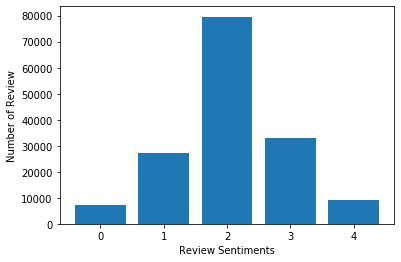

In [31]:
import matplotlib.pyplot as plt
Sentiment_count=data.groupby('Sentiment').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['Phrase'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

### Feature Generation using Bag of Words

Bag-of-words model(BoW ) is the simplest way of extracting features from the text. BoW converts text into the matrix of occurrence of words within a document. This model concerns about whether given words occurred or not in the document.

Doc 1: I love dogs. 

Doc 2: I hate dogs and knitting. 

Doc 3: Knitting is my hobby and passion.

Now, you can create a matrix of document and words by counting the occurrence of words in the given document. This matrix is known as Document-Term Matrix(DTM).

<img src='img/sentiment-analysis-02.png'/>

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(data['Phrase'])

<156060x14988 sparse matrix of type '<class 'numpy.int64'>'
	with 598944 stored elements in Compressed Sparse Row format>

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, data['Sentiment'], test_size=0.3, random_state=1)

In [36]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.6049169122986885


### Feature Generation using TF-IDF

In Term Frequency(TF), you just count the number of words occurred in each document. The main issue with this Term Frequency is that it will give more weight to longer documents. Term frequency is basically the output of the BoW model.

IDF(Inverse Document Frequency) measures the amount of information a given word provides across the document. IDF is the logarithmically scaled inverse ratio of the number of documents that contain the word and the total number of documents. 

<img src='img/sentiment-analysis-03.png'/>

TF-IDF(Term Frequency-Inverse Document Frequency) normalizes the document term matrix. It is the product of TF and IDF. Word with high tf-idf in a document, it is most of the times occurred in given documents and must be absent in the other documents. So the words must be a signature word.

<img src='img/sentiment-analysis-04.png'/>


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(data['Phrase'])
text_tf

<156060x15240 sparse matrix of type '<class 'numpy.float64'>'
	with 972099 stored elements in Compressed Sparse Row format>

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_tf, data['Sentiment'], test_size=0.3, random_state=123)

In [39]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.5865265496176684


## References

https://www.datacamp.com/community/tutorials/text-analytics-beginners-nltk

https://www.youtube.com/playlist?list=PLoROMvodv4rOFZnDyrlW3-nI7tMLtmiJZ&disable_polymer=true